In [1]:
import sys
import pandas
import matplotlib
import seaborn
import sklearn

print(sys.version)
print(pandas.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)

3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
0.23.4
3.0.2
0.20.1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
import pandas as pd

In [4]:
#Loading the data set

games = pd.read_csv('games.csv')

In [6]:
#Knowing the data set

print(games.columns)


print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


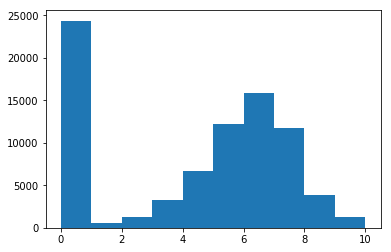

In [9]:
plt.hist(games['average_rating'])
plt.show()

In [18]:
#Printing the First row of value zero

print(games[games['average_rating'] == 0].iloc[0])

#Printing the First row of value greater than zero

print(games[games['average_rating'] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

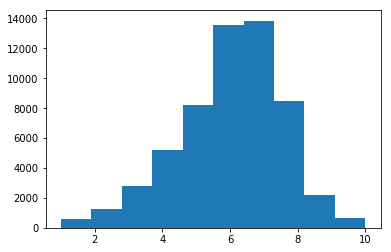

In [19]:
#Removing columns with no user rating

games = games[games['users_rated']>0]

#Removing null values

games = games.dropna(axis=0)

#Makng a histogram

plt.hist(games['average_rating'])
plt.show()

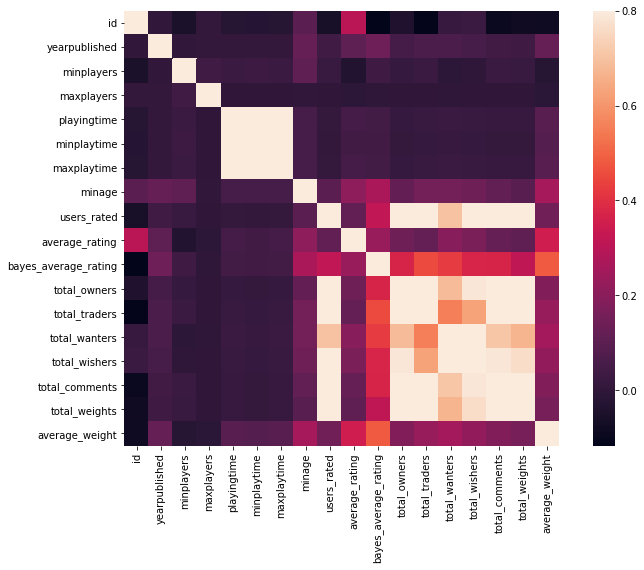

In [20]:
#Correlation Matrix

corrmat = games.corr()
fig = plt.figure(figsize=(12,8))

sns.heatmap(corrmat, vmax = .8, square=True)

In [21]:
#Get all the columns from the data frame

columns = games.columns.tolist()

#Remove all the columns that we do not need

columns = [c for c in columns if c not in ['bayes_average_rating','average_rating','type','name','id']]

#store the variable that we will be predicting on

target = 'average_rating'

In [22]:
#create train and test split data

train = games.sample(frac = 0.8, random_state = 1)

test = games.loc[~games.index.isin(train.index)]


#print shapes of train and test

print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [23]:
#import the learning model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#initialize the model

LR = LinearRegression()

#fit the model
LR.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
#Generate predictions
predictions = LR.predict(test[columns])

#Calculate the error
mean_squared_error(predictions, test[target])

2.078819032629326

In [26]:
#import Random forest regresion model
from sklearn.ensemble import RandomForestRegressor

#Initialize the model
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)

#fit the model
RFR.fit(train[columns],train[target])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [28]:
#generating predictions
predicts=RFR.predict(test[columns])

#calculate the error
mean_squared_error(predicts, test[target])

1.4458560046071653

In [35]:
#Make predictions with each model
rating_LR = LR.predict(test[columns].iloc[3].values.reshape(1, -1))
rating_RFR = RFR.predict(test[columns].iloc[3].values.reshape(1, -1))

#print predictions
print(rating_LR)
print(rating_RFR)

[7.70283656]
[7.72023235]


In [36]:
test[target].iloc[3]

7.87047